<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/2024_01/Turma06/LabFis4IntensidadeLuminosa_2024_1_Grupo3_turma06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV

Prática 01: Intensidade Luminosa

obj.: Verificar a relação: I = C/r^2

log (I(r)/I_max) = log(C) - 2.log(r)

y=m.x+b

y=log (I(r)/I_max); x=log (I(r)/I_max); m_t=-2 e b_t=log(C)

Dados do Exemplo: I_max=10 w/m²; I(r)=10,9,8,7,6,5,4,3,2,1; r=?




In [52]:
I_m=10

In [53]:
#Distãncia da fonte a fibra óptica
#r = [14.0,14.85,16.05,17.55,19.4,21.55,24.8,30.35,37.25,56.9] # cm - grupo 01,
#r=[1.9,2.0,2.45,2.51,3.0,3.85,4.5,5.6,7.6,12.9] # cm - grupo 02,
r = [5,7,9,11,13,15,17,19,21,23] #cm grupo 3,



In [54]:
#Intensidades Relativas:

IR =[ 1.0,0.71,0.54,0.43,0.31,0.28,0.24,0.22,0.2,0.11]

In [55]:
print(r)
N_medidas = len(r)
print ( "Número de medidas: {}".format( N_medidas ) )



[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
Número de medidas: 10


In [56]:
x = np.log10(r)
print ("x=log(r) = ", x)

x=log(r) =  [0.69897    0.84509804 0.95424251 1.04139269 1.11394335 1.17609126
 1.23044892 1.2787536  1.32221929 1.36172784]


In [57]:
y=np.log10(IR)
print ("y=log(IR) = ", y)

y=log(IR) =  [ 0.         -0.14874165 -0.26760624 -0.36653154 -0.50863831 -0.55284197
 -0.61978876 -0.65757732 -0.69897    -0.95860731]


In [58]:
media_X = x.mean()
media_X2 = ( x** 2 ).mean()
var_X_populacional = ( x ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (cm): {}".format( media_X ) )
print ( "Média quadrados(cm²): {}".format( media_X2 ) )
print ( "Variância (cm²): {}".format( var_X_populacional ) )
print ( "Desvio padrão (cm): {}".format( dp_X_populacional ) )



Média (cm): 1.1022887503392957
Média quadrados(cm²): 1.2573669580317925
Variância (cm²): 0.042326468907226245
Desvio padrão (cm): 0.2057339760643007


In [59]:
media_Y = y.mean()
media_Y2 = ( y** 2 ).mean()
var_Y_populacional = ( y ** 2 ).mean() - ( media_Y ** 2 )
dp_Y_populacional = np.sqrt( var_Y_populacional )
print ( "Média : {}".format( media_Y ) )
print ( "Média quadrados: {}".format( media_Y2 ) )
print ( "Variância : {}".format( var_Y_populacional ) )
print ( "Desvio padrão : {}".format( dp_Y_populacional ) )

Média : -0.4779303107345859
Média quadrados: 0.30164628070986027
Variância : 0.07322889879100242
Desvio padrão : 0.27060838640183055


In [60]:
x_X_y = ( x * y ).mean()
cov_populacional = x_X_y - ( media_X * media_Y )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_Y_populacional )
print ( "Covariância (logr × logIr): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )


Covariância (logr × logIr): -0.05444322790691103
Coeficiente de correlação: -0.9779048392003741


Coeficientes:


In [61]:
coeficiente_m = cov_populacional / var_X_populacional
print ( "Coeficiente m (cm): {}".format( coeficiente_m ) )


Coeficiente m (cm): -1.286269072580636


In [62]:

coeficiente_b = media_Y - coeficiente_m * media_X # cm
print ( "Coeficiente b (cm): {}".format( coeficiente_b ) )

Coeficiente b (cm): 0.9399096178804084


Incertezas:

In [63]:
arr_desvios_ajuste = ( y - ( coeficiente_m * x + coeficiente_b ) )
arr_desvios_ajuste

array([-0.04084612, -0.0016278 ,  0.01989677,  0.03307004, -0.01571704,
        0.02001823,  0.02299002,  0.04733427,  0.06185016, -0.14696853])

In [64]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (cm): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )



[1.66840541e-03 2.64972305e-06 3.95881440e-04 1.09362761e-03
 2.47025389e-04 4.00729393e-04 5.28540872e-04 2.24053324e-03
 3.82544276e-03 2.15997494e-02]
Soma quadrado desvios (cm): 0.032002585228833966


In [65]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )



epsilon_y = 0.06324810790532984


In [66]:
ep_y_2 = dp_Y_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 0.06324810790533363


In [67]:
ep_y = ep_y_2
sigma_m = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( sigma_m ) )


Incerteza padrão coeficiente m (cm): 0.09721684405420934


In [68]:
sigma_b = sigma_m * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (cm): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (cm): 0.10901155638588991


Estimativas para os coeficientes:

In [69]:
print ( "m = {:.2f} ± {:.2f} (cm)".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ) )

m = -1.29 ± 0.10 (cm)


In [70]:
print ( "b = {} ± {} (cm)".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ) )

b = 0.94 ± 0.11 (cm)


Text(0.4, 0.85, '$b = 0.94 \\pm 0.11\\,\\left(\\rm{cm}\\right)$')

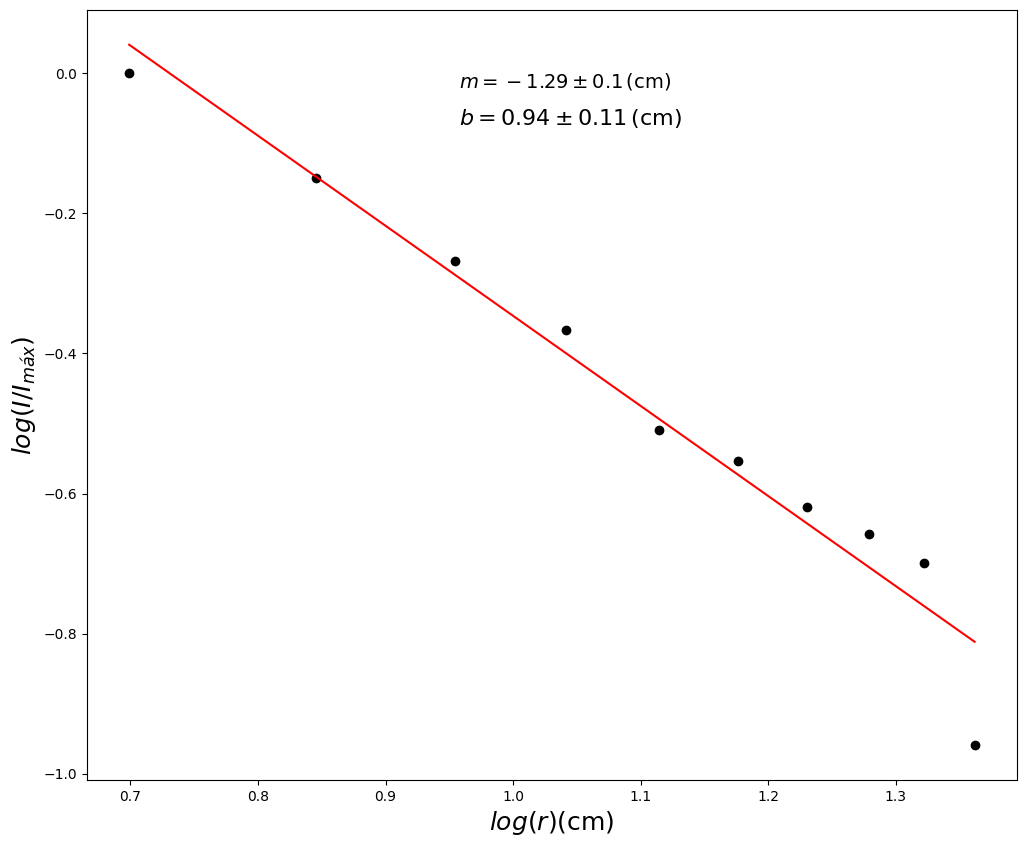

In [71]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( coeficiente_m * x + coeficiente_b ), '-r' )
plt.xlabel( r"$log(r) (\rm{cm})$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ),
          fontsize=14, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Usando um pacote:

In [72]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[ 0.93990961 -1.28626907] [[ 0.01188352 -0.01041786]
 [-0.01041786  0.00945111]]


In [73]:
print ( "Coeficiente m (cm): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (cm)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m (cm): -1.2862690686642724
Incerteza padrão coeficiente m (cm): 0.09721684505773041
a = -1.29 ± 0.10 (cm)


In [74]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (cm): 0.9399096140100613
Incerteza padrão coeficiente b (cm): 0.10901155712160797
0.94 ± 0.11 (cm)


Text(0.4, 0.85, '$b = 0.94 \\pm 0.11\\,\\left(\\rm{cm}\\right)$')

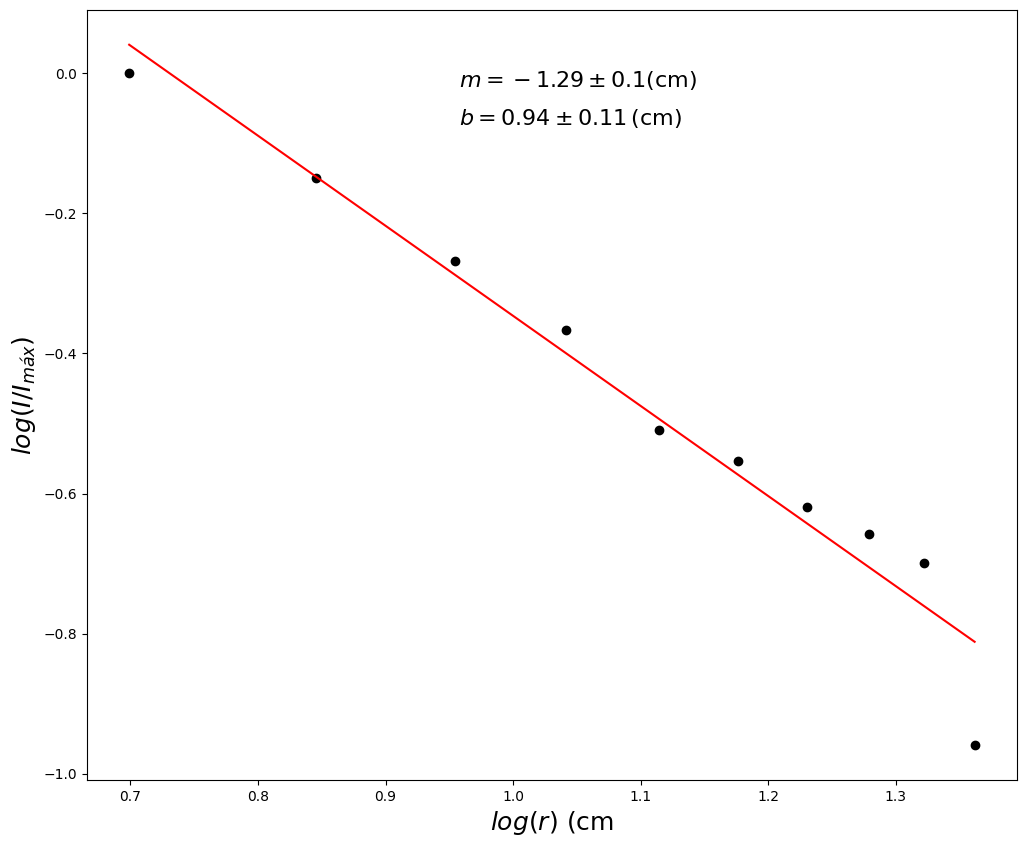

In [75]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-r' )
plt.xlabel( r"$log(r)~(\rm{{cm}}$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}(\rm{{cm}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )